# Análisis de Cluster 
SaturdaysAI: Equipo Tinto

## 1.- Implementación y visualización de k-means
Se importa las librerías necesarias

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

from sklearn.mixture import GaussianMixture

from sklearn import cluster,mixture
from itertools import cycle, islice
from sklearn import metrics
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

import scipy.stats

### 1.1- Se  leen los datos

In [5]:
df = pd.read_csv('base_final_lugares.csv')
df.head()

,place_id,name,business_status,latitude,longitude,user_ratings_total,rating,website,price_level,photos,...,satisfaccion,specials,comida_norm,servicio_norm,ambiente_norm,satisfaccion_norm,actividades,naturaleza,actividades_norm,naturaleza_norm
0,ChIJ_49r7jn_0YURdP7aK7krgd0,Museo Muca Roma,OPERATIONAL,19.419040,-99.162992,286.0,4.2,http://www.mucaroma.unam.mx/,NaN,"[{'height': 1077, 'html_attributions': ['<a hr...",...,23.0,NaN,NaN,NaN,0.184615,0.353846,NaN,NaN,NaN,NaN
1,ChIJ_6PxIP_-0YURb-iv-Yq3gPM,La Cocina Tradicional Mexicana,OPERATIONAL,19.388755,-99.141413,104.0,4.5,https://www.facebook.com/La-Cocina-Tradicional...,NaN,"[{'height': 3120, 'html_attributions': ['<a hr...",...,24.0,NaN,1.081967,0.327869,0.229508,0.393443,NaN,NaN,NaN,NaN
2,ChIJ04dL3rr40YURAM4KJYTf3F0,Santuario de Sta. María Auxiliadora,OPERATIONAL,19.445711,-99.177506,710.0,4.7,NaN,NaN,"[{'height': 4000, 'html_attributions': ['<a hr...",...,59.0,NaN,NaN,NaN,0.105263,0.621053,NaN,NaN,NaN,NaN
3,ChIJ06Wq3J4BzoUREnZuxiDcPo8,Candelilla 16,OPERATIONAL,19.297430,-99.120043,73.0,4.6,http://candelilla16.mx/,NaN,"[{'height': 3024, 'html_attributions': ['<a hr...",...,14.0,NaN,0.583333,0.083333,0.250000,0.388889,NaN,NaN,NaN,NaN
4,ChIJ0fhThCQA0oURALaHxBtFZ14,Museo Nacional De Arte (MUNAL),OPERATIONAL,19.436371,-99.139702,14666.0,4.8,http://www.munal.mx/es,NaN,"[{'height': 600, 'html_attributions': ['<a hre...",...,59.0,NaN,NaN,NaN,0.134146,0.719512,NaN,NaN,NaN,NaN


In [6]:
data = df.copy()
data = data[data['tipo_lugar']=='Comida mexicana']

In [7]:
data = data[['place_id', 'user_ratings_total', 'rating', 'price_level', 
                             'comida_norm', 'servicio_norm', 'ambiente_norm', 'satisfaccion_norm']]

In [16]:
data.head()

,place_id,user_ratings_total,rating,price_level,comida_norm,servicio_norm,ambiente_norm,satisfaccion_norm
1,ChIJ_6PxIP_-0YURb-iv-Yq3gPM,104.0,4.5,NaN,1.081967,0.327869,0.229508,0.393443
3,ChIJ06Wq3J4BzoUREnZuxiDcPo8,73.0,4.6,NaN,0.583333,0.083333,0.250000,0.388889
5,ChIJ0-IjfKoDzoURrhSoInEmyrs,94.0,4.7,1.0,0.975610,0.365854,0.390244,0.560976
7,ChIJ0RedUVYCzoURQcJ0Bo5LJew,108.0,4.6,NaN,1.192982,0.508772,0.438596,0.473684
8,ChIJ0Vr0QeUB0oURZfWZGMhVCpg,4939.0,4.5,3.0,0.531915,0.500000,0.148936,0.500000


In [19]:
# Diagnostico de números perdidos
for i in data.columns:
    print(i+': '+ str(data[i].isnull().sum()))

place_id: 0
user_ratings_total: 0
rating: 0
price_level: 41
comida_norm: 1
servicio_norm: 1
ambiente_norm: 1
satisfaccion_norm: 1


In [20]:
# Imputación de acuerdo a la media
data = data.fillna(value=data.mean())
data.head()

,place_id,user_ratings_total,rating,price_level,comida_norm,servicio_norm,ambiente_norm,satisfaccion_norm
1,ChIJ_6PxIP_-0YURb-iv-Yq3gPM,104.0,4.5,2.0,1.081967,0.327869,0.229508,0.393443
3,ChIJ06Wq3J4BzoUREnZuxiDcPo8,73.0,4.6,2.0,0.583333,0.083333,0.250000,0.388889
5,ChIJ0-IjfKoDzoURrhSoInEmyrs,94.0,4.7,1.0,0.975610,0.365854,0.390244,0.560976
7,ChIJ0RedUVYCzoURQcJ0Bo5LJew,108.0,4.6,2.0,1.192982,0.508772,0.438596,0.473684
8,ChIJ0Vr0QeUB0oURZfWZGMhVCpg,4939.0,4.5,3.0,0.531915,0.500000,0.148936,0.500000


In [22]:
# Se retpite diagnostico de números perdidos luego de aplicar metodo de imputación mean()
for i in data.columns:
    print(i+': '+ str(data[i].isnull().sum()))

place_id: 0
user_ratings_total: 0
rating: 0
price_level: 0
comida_norm: 0
servicio_norm: 0
ambiente_norm: 0
satisfaccion_norm: 0


 ### 1.2- Se visualiza y preprocesa las variables disponibles

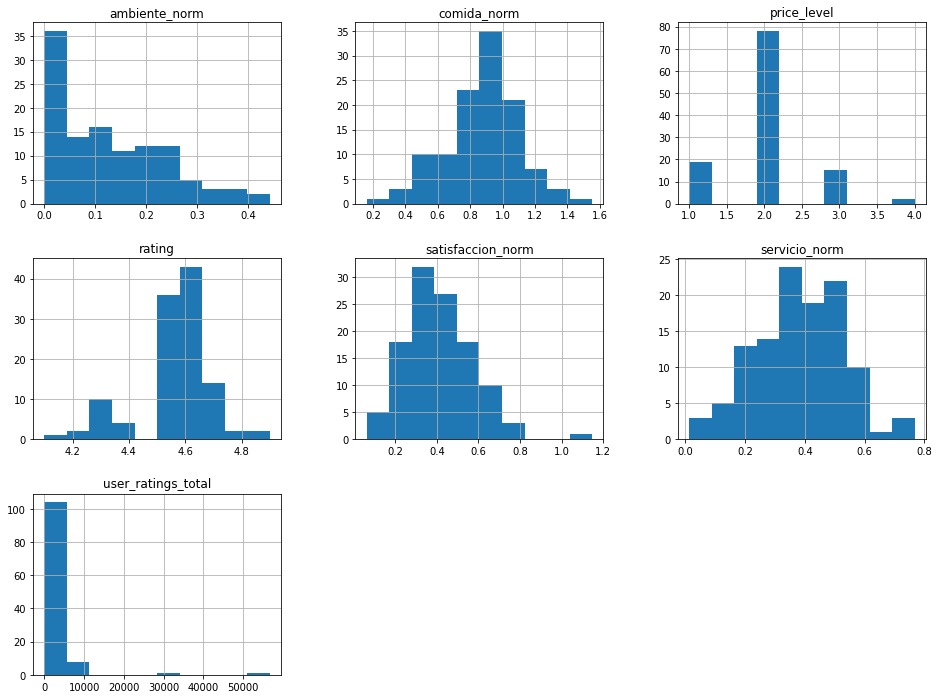

In [23]:
rcParams['figure.figsize'] = 16, 12
data.hist()
plt.show()

#### 1.2.1- Se Preprocesa las variables y normaliza

In [24]:
X = data.drop(['place_id'],1) # Se elimina la columna 
X=((X-X.min())/(X.max()-X.min())) #normalizamos
X

,user_ratings_total,rating,price_level,comida_norm,servicio_norm,ambiente_norm,satisfaccion_norm
1,0.001676,0.500,0.333333,0.661158,0.417739,0.518033,0.305140
3,0.001129,0.625,0.333333,0.302607,0.093826,0.564286,0.300942
5,0.001500,0.750,0.000000,0.584680,0.468054,0.880836,0.459611
7,0.001747,0.625,0.333333,0.740986,0.657364,0.989975,0.379126
8,0.086999,0.500,0.666667,0.265634,0.645745,0.336170,0.403390
...,...,...,...,...,...,...,...
254,0.070941,0.500,0.333333,0.538301,0.557438,0.250794,0.270207
255,0.009265,0.500,0.333333,0.524672,0.502895,0.442577,0.448588
256,0.199552,0.250,0.333333,0.242685,0.198691,0.197500,0.288136
257,0.034923,0.250,0.333333,0.214301,0.227449,0.504887,0.148617


#### 1.2.2- Se Aplica PCA con 2 componentes

In [25]:
pca=PCA(n_components=2)
pca.fit(X)

x_pca=pca.transform(X)
x_pca=pd.DataFrame(x_pca,columns=['c1','c2'])
dx_pca = x_pca
x_pca

,c1,c2
0,-0.127876,-0.061835
1,-0.003349,0.179972
2,-0.404903,-0.315374
3,-0.635715,-0.166609
4,-0.194610,0.367527
...,...,...
109,0.029431,-0.001770
110,-0.147846,-0.013778
111,0.318381,0.322812
112,0.119053,0.323930


#### 1.2.3- Se visualiza mediante sccater plot


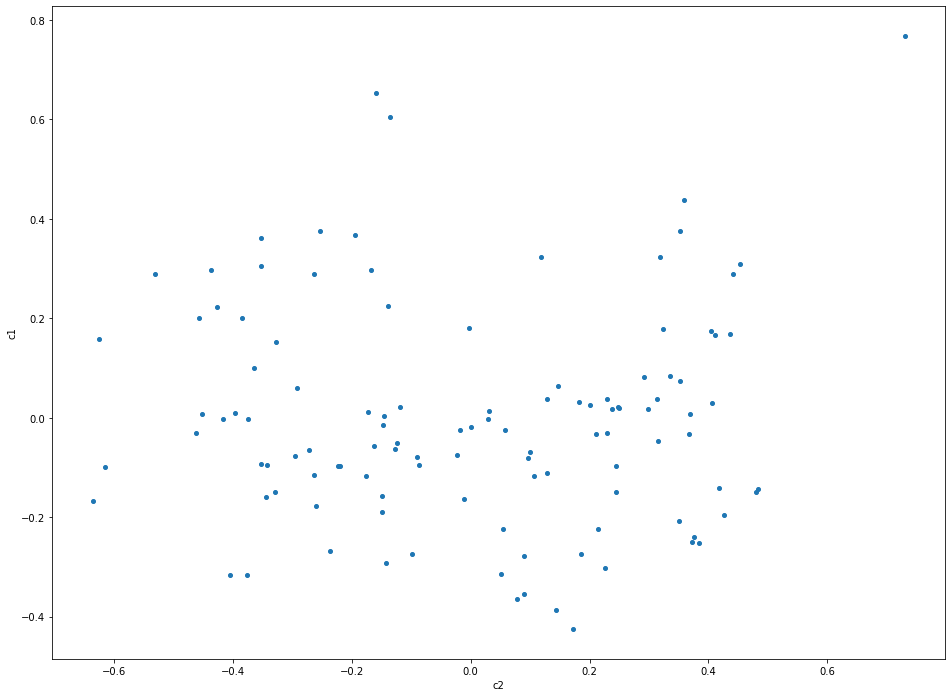

In [26]:
plt.scatter(x_pca['c1'],x_pca['c2'],s=16)
plt.ylabel('c1')
plt.xlabel('c2')
plt.show()

In [27]:
k_means = KMeans(n_clusters=3)
k_means.fit(x_pca)
centers = k_means.cluster_centers_
x_pca['clase'] = k_means.labels_
kmeans_inert = k_means.inertia_
#Asignación de clusters
kmeans_labels = k_means.labels_

No handles with labels found to put in legend.


[[-0.08814504 -0.14133963]
 [ 0.32812239  0.0466364 ]
 [-0.36888225  0.1948884 ]]


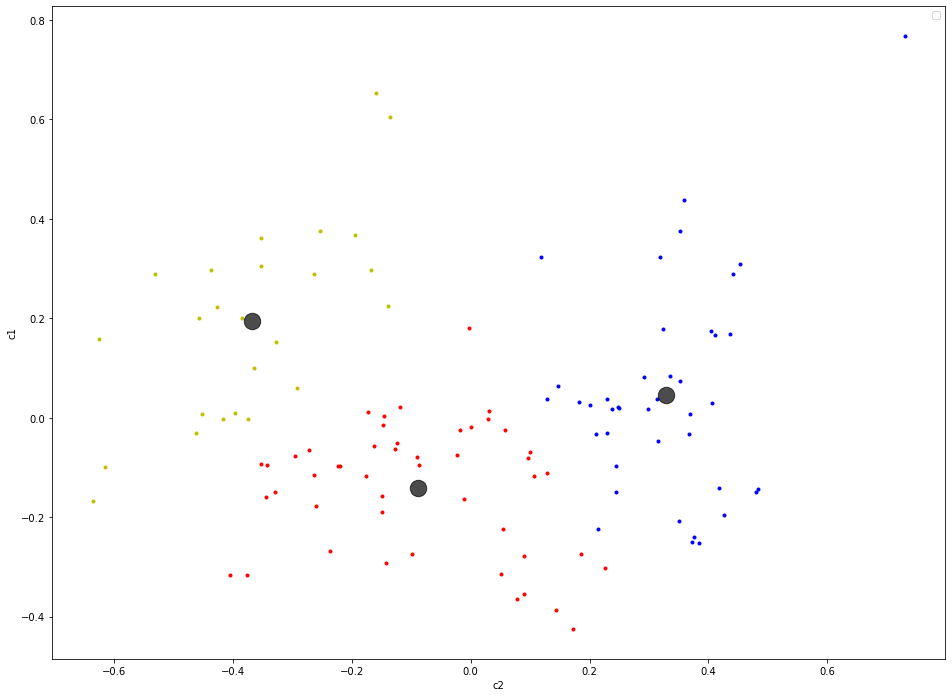

In [31]:
 colores = ['r.', 'b.', 'y.']
for i in range(0,3):
    plt.plot(x_pca['c1'][x_pca['clase']==i],x_pca['c2'][x_pca['clase']==i],colores[i],zorder = 1)
plt.ylabel('c1')
plt.xlabel('c2')
print(centers)

plt.scatter(centers[:, 0], centers[:, 1], s=270, color = 'black' , alpha = 0.7,zorder = 2)
plt.ylabel('c1')
plt.xlabel('c2')
plt.legend()
plt.show()

### 1.3- Se determina el número de cluster adecuados.


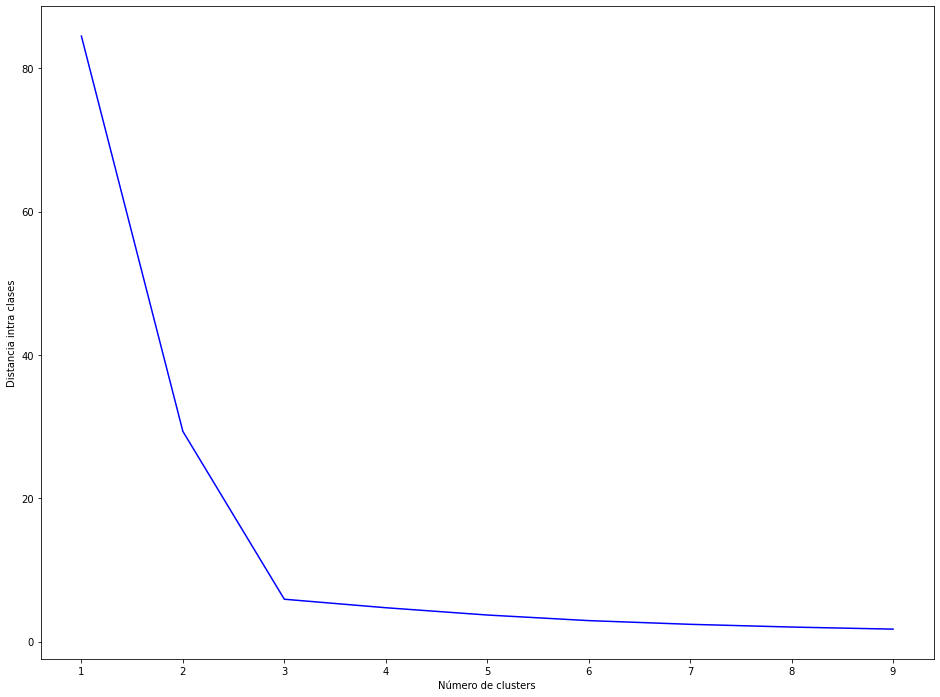

In [29]:
resultados = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(x_pca)
    resultados[k] = kmeans.inertia_
    
plt.figure()
plt.plot(list(resultados.keys()), list(resultados.values()), color ='b')
plt.xlabel("Número de clusters")
plt.ylabel("Distancia intra clases")
plt.show()